# Data Segmentation Workbook

## Purpose
Segment data into 10 tables, 1 for store combination.


# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import re

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)


# Data import
We retrieve all the required data for the analysis.

In [6]:
sales = pd.read_csv('../data/raw/walmart_sales_data/sales_train_evaluation.csv')
sales.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0       CA    0    0    0    0    0    0    0    0    0     0     0     0   
1       CA    0    0    0    0    0    0    0    0    0     0     0     0   
2       CA    0    0    0    0    0    0    0    0    0     0     0     0   
3       CA    0    0    0    0    0    0    0    0    0     0     0     0   
4       CA    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  ...  d_1917  d_1918  d_1919  \
0     0     0     0     0     0     0     0  ...       2       0       3   
1     0     0     0     0     0     0     0  ...       0       0       0   
2     0     0     0     0     0     0     0  ...       1       0       2   
3     0     0     0     0     0     0     0  ...       2       4       1   
4     0     0     0     0     0     0     0  ...       3       1       0   

   d_1920  d_1921  d_1922  d_1923  d_1924  d_1925  d_1926  d_1927  d_1928  \
0       5       0       0       1       1       0       2       1       2   
1       0       0       0       1       0       0       0       0       0   
2       1       0       0       0       0       2       1       3       0   
3       6       4       0       0       0       2       2       4       2   
4       3       2       3       1       1       3       2       3       2   

   d_1929  d_1930  d_1931  d_1932  d_1933  d_1934  d_1935  d_1936  d_1937  \
0       2       1       0       2       4       0       0       0       0   
1       0       0       0       0       1       2       1       1       0   
2       0       1       0       1       0       2       0       0       0   
3       1       1       1       1       1       0       4       0       1   
4       2       2       2       0       0       0       2       1       0   

   d_1938  d_1939  d_1940  d_1941  
0       3       3       0       1  
1       0       0       0       0  
2       2       3       0       1  
3       3       0       2       6  
4       0       2       1       0  

[5 rows x 1947 columns]

In [9]:
sales.dtypes

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1937       int64
d_1938       int64
d_1939       int64
d_1940       int64
d_1941       int64
Length: 1947, dtype: object

# Data processing

In [45]:
states = ['CA', 'WI', 'TX']
cats = ['HOBBIES', 'HOUSEHOLD', 'FOODS']
stores = [1, 2, 3, 4]
all_store_sales = pd.DataFrame()
for state in states:
    for store in stores:
        df = pd.DataFrame()
        store_sales = sales[(sales['store_id']==f'{state}_{store}')]
        if len(store_sales) > 0:
            store_sales = pd.DataFrame(store_sales.select_dtypes(include='int64').sum())
            store_sales.columns = [f'{state}_{store}']
            all_store_sales = pd.concat([all_store_sales, store_sales], axis=1, ignore_index=False)

all_store_sales

CA_1  CA_2  CA_3  CA_4  WI_1  WI_2  WI_3  TX_1  TX_2  TX_3
d_1     4337  3494  4739  1625  2704  2256  4038  2556  3852  3030
d_2     4155  3046  4827  1777  2194  1922  4198  2687  3937  3006
d_3     2816  2121  3785  1386  1562  2018  3317  1822  2731  2225
d_4     3051  2324  4232  1440  1251  2522  3211  2258  2954  2169
d_5     2630  1942  3817  1536     2  1175  2132  1694  2492  1726
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
d_1937  3995  3789  5375  2519  3242  4533  3268  3147  3518  3710
d_1938  4136  4037  5580  2544  3478  4628  3398  2748  3126  3288
d_1939  4433  4751  5542  2704  3813  4880  4126  3664  4249  4390
d_1940  5764  7120  7073  3146  5002  5213  4519  4167  4802  4712
d_1941  6289  6614  8144  3597  5054  5068  4757  4624  5217  4974

[1941 rows x 10 columns]

In [60]:
all_store_sales.set_index(pd.date_range(start='2011-01-29', end='2016-05-22'), drop=True, inplace=True)

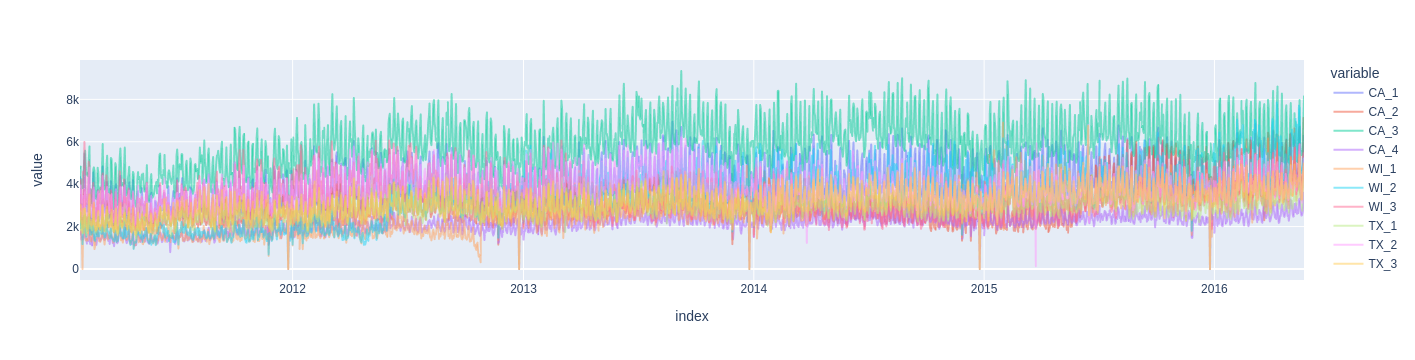

In [61]:
fig = px.line(all_store_sales, x=all_store_sales.index, y=all_store_sales.columns[0:])
fig.update_traces(opacity=0.5)
fig.show()

In [147]:
# Interpolate sales on days when stores are closed
all_store_sales.loc['2011-12-25',:] = (all_store_sales.loc['2011-12-24',:] + all_store_sales.loc['2011-12-26',:])/2

all_store_sales.loc['2012-12-25',:] = (all_store_sales.loc['2012-12-24',:] + all_store_sales.loc['2012-12-26',:])/2

all_store_sales.loc['2013-12-25',:] = (all_store_sales.loc['2013-12-24',:] + all_store_sales.loc['2013-12-26',:])/2

all_store_sales.loc['2014-12-25',:] = (all_store_sales.loc['2014-12-24',:] + all_store_sales.loc['2014-12-26',:])/2

all_store_sales.loc['2015-12-25',:] = (all_store_sales.loc['2015-12-24',:] + all_store_sales.loc['2015-12-26',:])/2

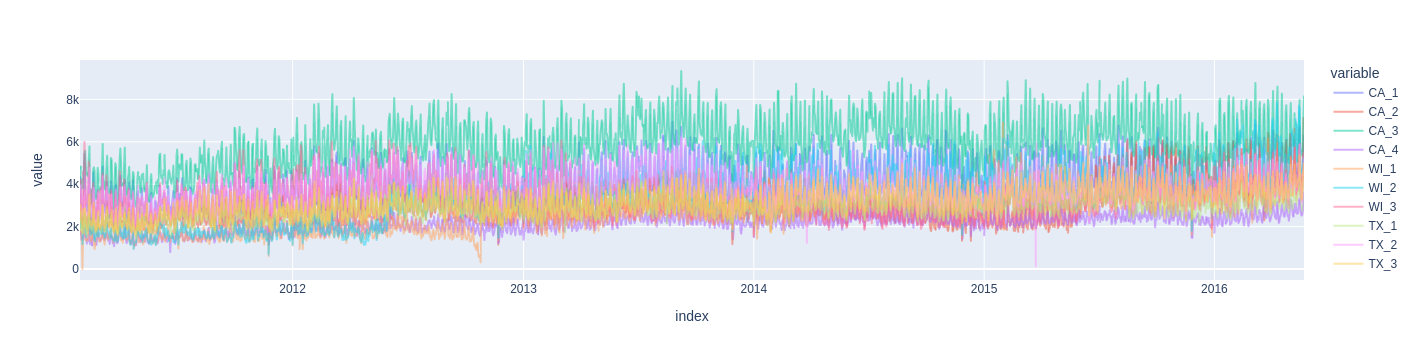

In [148]:
fig = px.line(all_store_sales, x=all_store_sales.index, y=all_store_sales.columns[0:])
fig.update_traces(opacity=0.5)
fig.show()

In [82]:
calendar_trends = pd.read_csv('../data/raw/google_trends/calendar_data_expanded.csv')
calendar_cpi_unemp = pd.read_csv('../data/raw/Calendar_with_CPI_UNEMP.csv')
calendar_cpi_unemp = calendar_cpi_unemp[calendar_cpi_unemp.columns[1:]]
calendar_gas = pd.read_csv('../data/raw/PET_PRI_GND_DCUS_NUS_W.csv')

calendar_data_list = [calendar_trends, calendar_cpi_unemp, calendar_gas]
updated_calendar_data_list = []
for calendar in calendar_data_list:
    try:
        calendar.set_index(pd.DatetimeIndex(calendar.date), drop=True, inplace=True)
        calendar.drop(columns=['date', 'd'], inplace=True)
        updated_calendar_data_list.append(calendar)
    except AttributeError:
        calendar.set_index(pd.DatetimeIndex(calendar.Date), drop=True, inplace=True)
        calendar.drop(columns=['Date'], inplace=True)
        calendar = calendar.resample('1D').ffill()['A1']
        updated_calendar_data_list.append(calendar)

calendar_data = pd.concat(updated_calendar_data_list, join='inner', axis=1)
calendar_data = calendar_data.loc[:, ~calendar_data.columns.duplicated()]
calendar_data

wm_yr_wk    weekday  wday  month  year event_name_1 event_type_1  \
2011-01-29     11101   Saturday     1      1  2011          NaN          NaN   
2011-01-30     11101     Sunday     2      1  2011          NaN          NaN   
2011-01-31     11101     Monday     3      1  2011          NaN          NaN   
2011-02-01     11101    Tuesday     4      2  2011          NaN          NaN   
2011-02-02     11101  Wednesday     5      2  2011          NaN          NaN   
...              ...        ...   ...    ...   ...          ...          ...   
2016-05-28     11618   Saturday     1      5  2016          NaN          NaN   
2016-05-29     11618     Sunday     2      5  2016          NaN          NaN   
2016-05-30     11618     Monday     3      5  2016  MemorialDay     National   
2016-05-31     11618    Tuesday     4      5  2016          NaN          NaN   
2016-06-01     11618  Wednesday     5      6  2016          NaN          NaN   

           event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  ca_walmart  \
2011-01-29          NaN          NaN        0        0        0       39.50   
2011-01-30          NaN          NaN        0        0        0       42.50   
2011-01-31          NaN          NaN        0        0        0       36.50   
2011-02-01          NaN          NaN        1        1        0       42.40   
2011-02-02          NaN          NaN        1        0        1       38.69   
...                 ...          ...      ...      ...      ...         ...   
2016-05-28          NaN          NaN        0        0        0       32.40   
2016-05-29          NaN          NaN        0        0        0       32.76   
2016-05-30          NaN          NaN        0        0        0       36.00   
2016-05-31          NaN          NaN        0        0        0       26.28   
2016-06-01          NaN          NaN        1        1        0       24.85   

            ca_hobbies  ca_household  ca_foods  tx_walmart  tx_hobbies  \
2011-01-29       20.14         36.50     63.00       44.00       17.48   
2011-01-30       30.02         29.00     67.90       41.50       11.40   
2011-01-31       22.42         48.00     60.90       36.50       24.70   
2011-02-01       19.08         38.50     62.70       41.34       13.32   
2011-02-02       21.96         35.20     57.42       39.75       11.16   
...                ...           ...       ...         ...         ...   
2016-05-28       33.63         33.15     45.92       36.00       34.20   
2016-05-29       57.00         25.35     48.72       36.00       13.11   
2016-05-30       43.32         36.40     54.32       34.92       31.92   
2016-05-31       47.88         44.85     48.16       28.44       20.52   
2016-06-01       37.38         39.52     53.00       25.20       11.34   

            tx_household  tx_foods  wi_walmart  wi_hobbies  wi_household  \
2011-01-29         33.00     49.70       33.00        0.00         39.00   
2011-01-30         34.50     58.80       49.00       20.90         19.00   
2011-01-31         28.50     56.70       36.00       14.44          6.50   
2011-02-01         55.00     66.00       42.93        7.92         25.30   
2011-02-02         50.60     52.14       45.58        8.64         11.00   
...                  ...       ...         ...         ...           ...   
2016-05-28         58.50     44.24       31.32        0.00         51.35   
2016-05-29         65.00     46.48       30.60       57.00         17.55   
2016-05-30         52.00     48.16       36.00       10.83         25.35   
2016-05-31         42.90     48.72       20.16       16.53         18.85   
2016-06-01         47.84     47.70       25.55        6.72         22.36   

            wi_foods  Customer_price_index  Unemployement_Rate     A1  
2011-01-29     63.70               221.187                 9.1  3.163  
2011-01-30     70.00               221.187                 9.1  3.163  
2011-01-31     63.00               221.187                 9.1  3.155  
2011-02-01  

In [83]:
calendar_data.drop(columns=['weekday'], inplace=True)
calendar_data

wm_yr_wk  wday  month  year event_name_1 event_type_1  \
2011-01-29     11101     1      1  2011          NaN          NaN   
2011-01-30     11101     2      1  2011          NaN          NaN   
2011-01-31     11101     3      1  2011          NaN          NaN   
2011-02-01     11101     4      2  2011          NaN          NaN   
2011-02-02     11101     5      2  2011          NaN          NaN   
...              ...   ...    ...   ...          ...          ...   
2016-05-28     11618     1      5  2016          NaN          NaN   
2016-05-29     11618     2      5  2016          NaN          NaN   
2016-05-30     11618     3      5  2016  MemorialDay     National   
2016-05-31     11618     4      5  2016          NaN          NaN   
2016-06-01     11618     5      6  2016          NaN          NaN   

           event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  ca_walmart  \
2011-01-29          NaN          NaN        0        0        0       39.50   
2011-01-30          NaN          NaN        0        0        0       42.50   
2011-01-31          NaN          NaN        0        0        0       36.50   
2011-02-01          NaN          NaN        1        1        0       42.40   
2011-02-02          NaN          NaN        1        0        1       38.69   
...                 ...          ...      ...      ...      ...         ...   
2016-05-28          NaN          NaN        0        0        0       32.40   
2016-05-29          NaN          NaN        0        0        0       32.76   
2016-05-30          NaN          NaN        0        0        0       36.00   
2016-05-31          NaN          NaN        0        0        0       26.28   
2016-06-01          NaN          NaN        1        1        0       24.85   

            ca_hobbies  ca_household  ca_foods  tx_walmart  tx_hobbies  \
2011-01-29       20.14         36.50     63.00       44.00       17.48   
2011-01-30       30.02         29.00     67.90       41.50       11.40   
2011-01-31       22.42         48.00     60.90       36.50       24.70   
2011-02-01       19.08         38.50     62.70       41.34       13.32   
2011-02-02       21.96         35.20     57.42       39.75       11.16   
...                ...           ...       ...         ...         ...   
2016-05-28       33.63         33.15     45.92       36.00       34.20   
2016-05-29       57.00         25.35     48.72       36.00       13.11   
2016-05-30       43.32         36.40     54.32       34.92       31.92   
2016-05-31       47.88         44.85     48.16       28.44       20.52   
2016-06-01       37.38         39.52     53.00       25.20       11.34   

            tx_household  tx_foods  wi_walmart  wi_hobbies  wi_household  \
2011-01-29         33.00     49.70       33.00        0.00         39.00   
2011-01-30         34.50     58.80       49.00       20.90         19.00   
2011-01-31         28.50     56.70       36.00       14.44          6.50   
2011-02-01         55.00     66.00       42.93        7.92         25.30   
2011-02-02         50.60     52.14       45.58        8.64         11.00   
...                  ...       ...         ...         ...           ...   
2016-05-28         58.50     44.24       31.32        0.00         51.35   
2016-05-29         65.00     46.48       30.60       57.00         17.55   
2016-05-30         52.00     48.16       36.00       10.83         25.35   
2016-05-31         42.90     48.72       20.16       16.53         18.85   
2016-06-01         47.84     47.70       25.55        6.72         22.36   

            wi_foods  Customer_price_index  Unemployement_Rate     A1  
2011-01-29     63.70               221.187                 9.1  3.163  
2011-01-30     70.00               221.187                 9.1  3.163  
2011-01-31     63.00               221.187                 9.1  3.155  
2011-02-01     42.24               221.898                 9.0  3.155  
2011-02-02     48.18               221.898                 9.0  3.155  


In [85]:
calendar_data.fillna('None', inplace=True)
calendar_data

wm_yr_wk  wday  month  year event_name_1 event_type_1  \
2011-01-29     11101     1      1  2011         None         None   
2011-01-30     11101     2      1  2011         None         None   
2011-01-31     11101     3      1  2011         None         None   
2011-02-01     11101     4      2  2011         None         None   
2011-02-02     11101     5      2  2011         None         None   
...              ...   ...    ...   ...          ...          ...   
2016-05-28     11618     1      5  2016         None         None   
2016-05-29     11618     2      5  2016         None         None   
2016-05-30     11618     3      5  2016  MemorialDay     National   
2016-05-31     11618     4      5  2016         None         None   
2016-06-01     11618     5      6  2016         None         None   

           event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  ca_walmart  \
2011-01-29         None         None        0        0        0       39.50   
2011-01-30         None         None        0        0        0       42.50   
2011-01-31         None         None        0        0        0       36.50   
2011-02-01         None         None        1        1        0       42.40   
2011-02-02         None         None        1        0        1       38.69   
...                 ...          ...      ...      ...      ...         ...   
2016-05-28         None         None        0        0        0       32.40   
2016-05-29         None         None        0        0        0       32.76   
2016-05-30         None         None        0        0        0       36.00   
2016-05-31         None         None        0        0        0       26.28   
2016-06-01         None         None        1        1        0       24.85   

            ca_hobbies  ca_household  ca_foods  tx_walmart  tx_hobbies  \
2011-01-29       20.14         36.50     63.00       44.00       17.48   
2011-01-30       30.02         29.00     67.90       41.50       11.40   
2011-01-31       22.42         48.00     60.90       36.50       24.70   
2011-02-01       19.08         38.50     62.70       41.34       13.32   
2011-02-02       21.96         35.20     57.42       39.75       11.16   
...                ...           ...       ...         ...         ...   
2016-05-28       33.63         33.15     45.92       36.00       34.20   
2016-05-29       57.00         25.35     48.72       36.00       13.11   
2016-05-30       43.32         36.40     54.32       34.92       31.92   
2016-05-31       47.88         44.85     48.16       28.44       20.52   
2016-06-01       37.38         39.52     53.00       25.20       11.34   

            tx_household  tx_foods  wi_walmart  wi_hobbies  wi_household  \
2011-01-29         33.00     49.70       33.00        0.00         39.00   
2011-01-30         34.50     58.80       49.00       20.90         19.00   
2011-01-31         28.50     56.70       36.00       14.44          6.50   
2011-02-01         55.00     66.00       42.93        7.92         25.30   
2011-02-02         50.60     52.14       45.58        8.64         11.00   
...                  ...       ...         ...         ...           ...   
2016-05-28         58.50     44.24       31.32        0.00         51.35   
2016-05-29         65.00     46.48       30.60       57.00         17.55   
2016-05-30         52.00     48.16       36.00       10.83         25.35   
2016-05-31         42.90     48.72       20.16       16.53         18.85   
2016-06-01         47.84     47.70       25.55        6.72         22.36   

            wi_foods  Customer_price_index  Unemployement_Rate     A1  
2011-01-29     63.70               221.187                 9.1  3.163  
2011-01-30     70.00               221.187                 9.1  3.163  
2011-01-31     63.00               221.187                 9.1  3.155  
2011-02-01     42.24               221.898                 9.0  3.155  
2011-02-02     48.18               221.898                 9.0  3.155  


In [95]:
calendar_data.rename(columns={'A1': 'gas_price'}, inplace=True)
calendar_data.columns = [col.lower() for col in calendar_data.columns]
calendar_data

wm_yr_wk  wday  month  year event_name_1 event_type_1  \
2011-01-29     11101     1      1  2011         None         None   
2011-01-30     11101     2      1  2011         None         None   
2011-01-31     11101     3      1  2011         None         None   
2011-02-01     11101     4      2  2011         None         None   
2011-02-02     11101     5      2  2011         None         None   
...              ...   ...    ...   ...          ...          ...   
2016-05-28     11618     1      5  2016         None         None   
2016-05-29     11618     2      5  2016         None         None   
2016-05-30     11618     3      5  2016  MemorialDay     National   
2016-05-31     11618     4      5  2016         None         None   
2016-06-01     11618     5      6  2016         None         None   

           event_name_2 event_type_2  snap_ca  snap_tx  snap_wi  ca_walmart  \
2011-01-29         None         None        0        0        0       39.50   
2011-01-30         None         None        0        0        0       42.50   
2011-01-31         None         None        0        0        0       36.50   
2011-02-01         None         None        1        1        0       42.40   
2011-02-02         None         None        1        0        1       38.69   
...                 ...          ...      ...      ...      ...         ...   
2016-05-28         None         None        0        0        0       32.40   
2016-05-29         None         None        0        0        0       32.76   
2016-05-30         None         None        0        0        0       36.00   
2016-05-31         None         None        0        0        0       26.28   
2016-06-01         None         None        1        1        0       24.85   

            ca_hobbies  ca_household  ca_foods  tx_walmart  tx_hobbies  \
2011-01-29       20.14         36.50     63.00       44.00       17.48   
2011-01-30       30.02         29.00     67.90       41.50       11.40   
2011-01-31       22.42         48.00     60.90       36.50       24.70   
2011-02-01       19.08         38.50     62.70       41.34       13.32   
2011-02-02       21.96         35.20     57.42       39.75       11.16   
...                ...           ...       ...         ...         ...   
2016-05-28       33.63         33.15     45.92       36.00       34.20   
2016-05-29       57.00         25.35     48.72       36.00       13.11   
2016-05-30       43.32         36.40     54.32       34.92       31.92   
2016-05-31       47.88         44.85     48.16       28.44       20.52   
2016-06-01       37.38         39.52     53.00       25.20       11.34   

            tx_household  tx_foods  wi_walmart  wi_hobbies  wi_household  \
2011-01-29         33.00     49.70       33.00        0.00         39.00   
2011-01-30         34.50     58.80       49.00       20.90         19.00   
2011-01-31         28.50     56.70       36.00       14.44          6.50   
2011-02-01         55.00     66.00       42.93        7.92         25.30   
2011-02-02         50.60     52.14       45.58        8.64         11.00   
...                  ...       ...         ...         ...           ...   
2016-05-28         58.50     44.24       31.32        0.00         51.35   
2016-05-29         65.00     46.48       30.60       57.00         17.55   
2016-05-30         52.00     48.16       36.00       10.83         25.35   
2016-05-31         42.90     48.72       20.16       16.53         18.85   
2016-06-01         47.84     47.70       25.55        6.72         22.36   

            wi_foods      cpi  unemployment_rate  gas_price  
2011-01-29     63.70  221.187                9.1      3.163  
2011-01-30     70.00  221.187                9.1      3.163  
2011-01-31     63.00  221.187                9.1      3.155  
2011-02-01     42.24  221.898                9.0      3.155  
2011-02-02     48.18  221.898                9.0      3.155  
...              ...      ...                ...        ... 

In [108]:
list(calendar_data.columns[:8]) + list(calendar_data.columns[-3:])

['wm_yr_wk',
 'wday',
 'month',
 'year',
 'event_name_1',
 'event_type_1',
 'event_name_2',
 'event_type_2',
 'cpi',
 'unemployment_rate',
 'gas_price']

In [124]:
sell_prices = pd.read_csv('../data/raw/walmart_sales_data/sell_prices.csv')
agg_prices = sell_prices.groupby(['store_id', 'wm_yr_wk'])['sell_price'].agg([np.median, np.min, np.max])
agg_prices.reset_index(inplace=True)
agg_prices.rename(columns={'median': 'median_price', 'amin': 'min_price', 'amax': 'max_price'}, inplace=True)
agg_prices

store_id  wm_yr_wk  median_price  min_price  max_price
0        CA_1     11101          3.18       0.20      20.00
1        CA_1     11102          3.24       0.20      20.00
2        CA_1     11103          3.25       0.20      22.00
3        CA_1     11104          3.25       0.20      22.00
4        CA_1     11105          3.27       0.20      22.00
...       ...       ...           ...        ...        ...
2815     WI_3     11617          3.48       0.23      29.97
2816     WI_3     11618          3.48       0.23      29.97
2817     WI_3     11619          3.48       0.23      29.97
2818     WI_3     11620          3.48       0.23      29.97
2819     WI_3     11621          3.48       0.23      29.97

[2820 rows x 5 columns]

In [149]:
general_calendar_cols = list(calendar_data.columns[:8]) + list(calendar_data.columns[-3:])
for store in all_store_sales.columns:
    store_sales = pd.DataFrame(all_store_sales[store])
    state = re.split('_', store)[0].lower()
    state_specific_cols = [col for col in calendar_data.columns if state in col]
    calendar_col_list = general_calendar_cols + state_specific_cols
    state_calendar = calendar_data[calendar_col_list]
    merged = pd.concat([state_calendar, store_sales], axis=1)
    print(merged)
    state_agg_prices = agg_prices[agg_prices['store_id']==store]
    merged = merged.merge(state_agg_prices[state_agg_prices.columns[1:]], on='wm_yr_wk')
    merged.set_index(pd.date_range(start='2011-01-29', end='2016-06-01'), drop=True, inplace=True)
    merged.rename(columns={store: 'store_sales'}, inplace=True)
    merged.to_csv(f'../data/processed/{store}_sales_data.csv')

            wm_yr_wk  wday  month  year event_name_1 event_type_1  \
2011-01-29     11101     1      1  2011         None         None   
2011-01-30     11101     2      1  2011         None         None   
2011-01-31     11101     3      1  2011         None         None   
2011-02-01     11101     4      2  2011         None         None   
2011-02-02     11101     5      2  2011         None         None   
...              ...   ...    ...   ...          ...          ...   
2016-05-28     11618     1      5  2016         None         None   
2016-05-29     11618     2      5  2016         None         None   
2016-05-30     11618     3      5  2016  MemorialDay     National   
2016-05-31     11618     4      5  2016         None         None   
2016-06-01     11618     5      6  2016         None         None   

           event_name_2 event_type_2      cpi  unemployment_rate  gas_price  \
2011-01-29         None         None  221.187                9.1      3.163   
2011-01-30   